In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

In [2]:
#import datasets
train = pd.read_csv('train.csv')

In [3]:
bs = pd.read_csv('Building_Structure.csv')
bo = pd.read_csv('Building_Ownership_Use.csv')

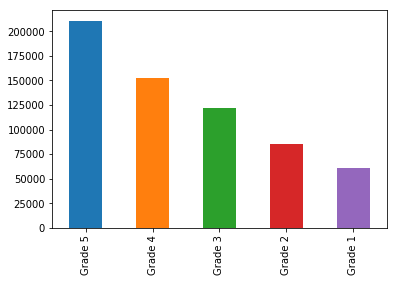

In [4]:
train.damage_grade.value_counts().plot('bar')

In [5]:
#merging all three files
train = pd.merge(train, bs, on='building_id')

In [6]:
train = pd.merge(train, bo, on='building_id')

In [7]:
train.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape

(631761, 58)

In [9]:
train.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


From above we found that some of the values are not integers so we should change them. lets first store all these objects dtype in a list

In [10]:
object_type_columns = ['area_assesed', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'legal_ownership_status']

Lets see whether there is any missing values

In [11]:
columns_has_NaN = train.isna().sum()

In [12]:
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]

In [13]:
columns_has_NaN

has_repair_started    33417
count_families            1
dtype: int64

We can see now which columns have missing values

In [14]:
total_NaN = columns_has_NaN.sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 33418


Lets fill these values with 0

In [15]:
train.fillna(0, inplace=True)

In [16]:
total_NaN = train.isna().sum().sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 0


Now time to work for those object dtype values, lets change them to int values using labelencoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
number = LabelEncoder()
for col in object_type_columns:
    train[col] = number.fit_transform(train[col].astype('str'))

In [19]:
train.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train.dtypes

area_assesed                                int64
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


So all values are now changed apart from district id and damage grade that obviously cant be changed.
Now lets separate the target label from the input label

In [21]:
X_train = train.drop(columns=['damage_grade', 'building_id'])
X_train.head()

,area_assesed,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,44,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,30,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_train = pd.DataFrame(train.damage_grade)
y_train.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [23]:
X_train.shape

(631761, 56)

Lets remove the duplicates if any

In [24]:
duplicates = X_train.duplicated(keep=False)

In [25]:
X_train = X_train[~duplicates]

In [26]:
X_train.shape

(617725, 56)

In [27]:
y_train = y_train[~duplicates]

In [28]:
y_train.shape

(617725, 1)

In [29]:
y_train.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [30]:
total_number_of_features = len(X_train.columns)
print("Total number of features after pre processing = " + str(total_number_of_features))

Total number of features after pre processing = 56


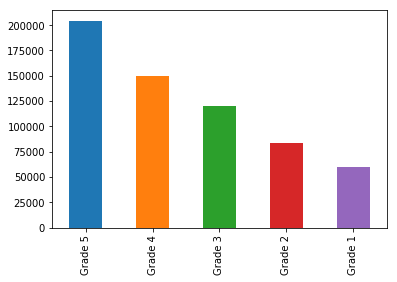

In [31]:
y_train.damage_grade.value_counts().plot('bar')

Lets do the same thing for our test data

In [32]:
test = pd.read_csv('test.csv')
test = pd.merge(test, bs, on='building_id')
test = pd.merge(test, bo, on='building_id')

columns_has_NaN = test.isna().sum()
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]
test.fillna(0, inplace=True)

for col in object_type_columns:
    test[col] = number.fit_transform(test[col].astype('str'))

In [33]:
test.head()

,area_assesed,building_id,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,a3380c4f75,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,a338a4e653,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,a338a4e6b7,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,a33a6eaa3a,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,a33b073ff6,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So finally lets save all these preprocessed data to a new csv file

In [34]:
test.to_csv('X_test2.csv')
y_train.to_csv('y_train.csv')
X_train.to_csv('X_train2.csv')